# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
data = {'StudentID':[1,2,3,4,5,6,7,8,9,10],
        'Age':[17,51,27,21,36,48,19,26,54,30],
        'Tardies':[10,1,5,9,4,2,9,6,0,3]}
student_data = pd.DataFrame(data)
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


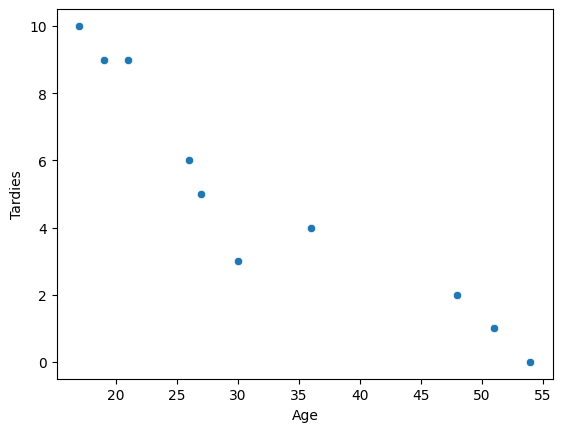

In [6]:
sns.scatterplot(student_data,x='Age',y='Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

The initial hypothesis seems right, since there is an inverse relation between the age and the tardiness.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.
#correlation:
print('Correlation:')
print(np.corrcoef(student_data.Age, student_data.Tardies))
print('\n')
#covariance:
print('Covariance:')
print(np.cov(student_data.Age, student_data.Tardies))


Correlation:
[[ 1.         -0.93916269]
 [-0.93916269  1.        ]]


Covariance:
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Covariance is not normalized and gets any value from minus infinitive to positive infinitive. It shows how the two variables vary in relation to each other.
However, correlation is a normalized value of covariance and shows both the way two variables vary in relation to each other and the strength of the relation.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
x = pd.DataFrame(student_data['Age'])
y = student_data['Tardies'] 

In [20]:
result = model.fit(x,y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)


Intercept: 12.888803363135771
Coefficient: [-0.24282077]


Plot your regression model on your scatter plot.

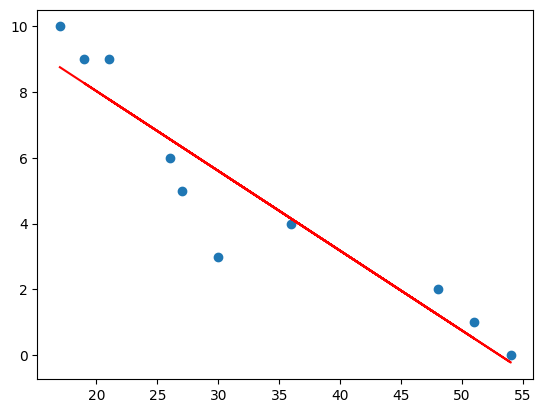

In [26]:
reg_line = result.intercept_ + (student_data['Age'] * result.coef_)
plt.plot(student_data['Age'], reg_line, color='red')
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()


Based on the initial hypothesis the outcome variable would be Tardies.
Since we have only one dependent variable the method we use, is single variable linear regression. 


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

The model confirms that there is an inverse linear relation between Age and Tardiness. This means the older a student is, the more punctual he will be.
Maybe this model could predict the tardiness of students in future classes, but this model is trained on a very small data set so we can’t generalize it to all the students.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [2]:
#vehicles = pd.read_csv(r'lab-regression-analysis\your-code\vehicles.csv')
#It didn't work with this line
vehicles = pd.read_csv(r'D:\IronHack\labs\regression\lab-regression-analysis\your-code\vehicles.csv')
vehicles.sample(10)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
5162,Chevrolet,Cavalier Wagon,1985,2.0,4.0,Manual 4-spd,Front-Wheel Drive,Small Station Wagons,Regular,13.184400,22,29,25,355.480000,1350
4721,Chevrolet,C1500 Pickup 2WD,1995,6.5,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Diesel,22.481471,15,20,17,598.823529,2150
7685,Chevrolet,Tracker 4WD Hardtop,2003,2.0,4.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Sport Utility Vehicle - 4WD,Regular,15.695714,20,23,21,423.190476,1600
24503,Mercedes-Benz,SLK350,2015,3.5,6.0,Automatic 7-spd,Rear-Wheel Drive,Two Seaters,Premium,13.733750,21,29,24,368.000000,1700
9837,Dodge,Dakota Pickup 2WD,2007,4.7,8.0,Manual 6-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Regular,21.974000,13,19,15,592.466667,2200
17463,Honda,Element 2WD,2011,2.4,4.0,Automatic 5-spd,Front-Wheel Drive,Sport Utility Vehicle - 2WD,Regular,14.982273,20,25,22,403.954545,1500
10169,Dodge,Intrepid,1995,3.3,6.0,Automatic 4-spd,Front-Wheel Drive,Large Cars,Regular,17.347895,16,24,19,467.736842,1750
9807,Dodge,Dakota Pickup 2WD,2001,3.9,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Regular,20.600625,14,20,16,555.437500,2100
19239,Jaguar,F-Type S Convertible,2016,3.0,6.0,Automatic (S8),Rear-Wheel Drive,Two Seaters,Premium,14.982273,19,27,22,408.000000,1850
15201,GMC,S15 Cab Chassis 2WD,1988,2.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,23.543571,14,15,14,634.785714,2400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
vehicles_analysis = vehicles[['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

In [31]:
vehicles_analysis.isnull().sum()

CO2 Emission Grams/Mile    0
Year                       0
Cylinders                  0
Fuel Barrels/Year          0
Combined MPG               0
Fuel Cost/Year             0
dtype: int64

In [32]:
vehicles_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CO2 Emission Grams/Mile  35952 non-null  float64
 1   Year                     35952 non-null  int64  
 2   Cylinders                35952 non-null  float64
 3   Fuel Barrels/Year        35952 non-null  float64
 4   Combined MPG             35952 non-null  int64  
 5   Fuel Cost/Year           35952 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


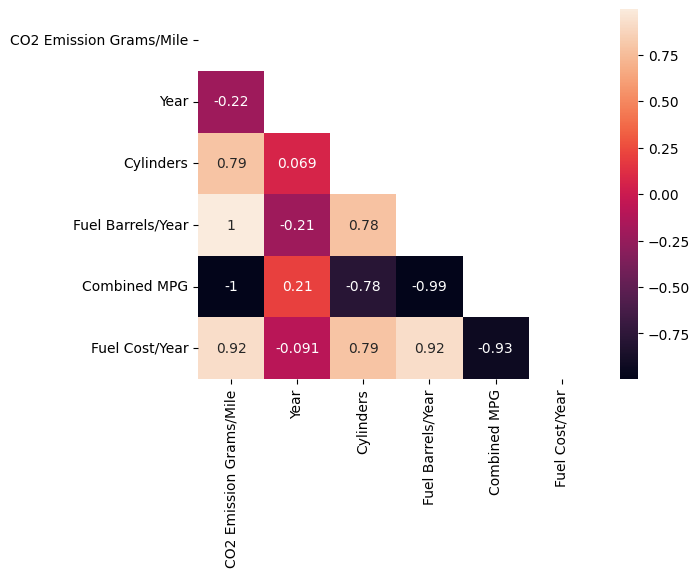

In [47]:
vehicles_analysis_corr = vehicles_analysis.corr(method='spearman')
mask = np.zeros_like(vehicles_analysis_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(vehicles_analysis.corr(method='spearman'), mask=mask, annot=True)
plt.show()

Fuel Barrels/Year and Combined MPG are highly correlated with the outcome variable with an absolute score of one for the correlation score. However, as it was discussed in class these kinds of variables don’t provide any useful information for our model, since they are practically the same variable from the perspective of the regression model. Also, these two variables store values within the same concept and easily can be calculated based on each other. The Fuel cost/year variable also shows the same behavior, so we can choose only one of these 3 variables for our model. Year and Cylinders are good candidates for independent variables. Meaningful correlation with the outcome variable in opposing directions.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

As it mentioned before, first I drop the highly correlated variables.

In [ ]:
vehicles_analysis.drop('Fuel Barrels/Year', axis=1, inplace=True)


In [7]:
vehicles_analysis

,CO2 Emission Grams/Mile,Year,Cylinders,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,17,1950
1,683.615385,1984,6.0,13,2550
2,555.437500,1985,4.0,16,2100
3,683.615385,1985,6.0,13,2550
4,555.437500,1987,6.0,16,2550
...,...,...,...,...,...
35947,244.000000,2013,3.0,36,1100
35948,243.000000,2014,3.0,36,1100
35949,244.000000,2015,3.0,36,1100
35950,246.000000,2016,3.0,36,1100


In [8]:
X = vehicles_analysis.drop('CO2 Emission Grams/Mile', axis=1)
Y = vehicles_analysis['CO2 Emission Grams/Mile'] 

In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression()
result = model.fit(X,Y)

In [28]:
a = list(vehicles_analysis.columns).remove('CO2 Emission Grams/Mile')
a

In [44]:
pd.DataFrame(data=[result.coef_],index=['Coef'], columns=['Year','Cylinders','Combined MPG','Fuel Cost/Year'])

,Year,Cylinders,Combined MPG,Fuel Cost/Year
Coef,-1.179005,6.202984,-9.703811,0.114105


In [45]:
result.intercept_

2775.8454009612387

In [46]:
result.score(X, Y)

0.9292105333039893

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

I used a multivariable regression model since the number of independent variables is more than one.
Based on coef_ table ‘combined MPG’ has the greatest coefficient in the predictor equation, which means, that one unit change in the amount of combined MPG leads to a 9.7 unit decrease in outcome value. After this, comes ‘Cylinders ’ and ‘Year’ respectively.
‘R2 scores’ indicates that the trained model fits perfectly with the training data.


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [72]:
dt = {'invited': [1,3,4,6,8,9,11,14],'attendees':[1,2,4,4,5,7,8,13]}
party = pd.DataFrame(data=dt)
party['absentees'] = party.invited - party.attendees
party


,invited,attendees,absentees
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [73]:
X = pd.DataFrame(party['invited'])
Y = party.absentees
model = linear_model.LinearRegression()
result = model.fit(X,Y)
print(f"coef is {round(float(result.coef_),2)} and intercept is {round(float(result.intercept_),2)}. ")

coef is 0.15 and intercept is 0.44. 


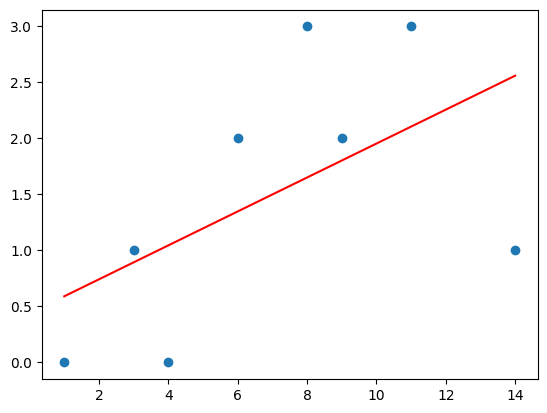

In [74]:
reg_line = result.intercept_ + (result.coef_ * party['invited'])
plt.plot(party['invited'],reg_line, color='r')
plt.scatter(data= party, x='invited', y='absentees')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [75]:
print(f"coef is {round(float(result.coef_),2)} and intercept is {round(float(result.intercept_),2)}. ") 
print(reg_line)

coef is 0.15 and intercept is 0.44. 
0    0.590909
1    0.893939
2    1.045455
3    1.348485
4    1.651515
5    1.803030
6    2.106061
7    2.560606
Name: invited, dtype: float64


It supports the initial hypothesis. The more people are invited to the party, the more is unable to attend.  

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Two data points do not follow the general pattern. 2nd and 7th data points. 

In [76]:
new_party = party.drop(index=[2,7],axis=0)
new_party


,invited,attendees,absentees
0,1,1,0
1,3,2,1
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3


In [77]:
X = pd.DataFrame(new_party['invited'])
Y = new_party.absentees
model = linear_model.LinearRegression()
result = model.fit(X,Y)
print(f"coef is {round(float(result.coef_),2)} and intercept is {round(float(result.intercept_),2)}. ")

coef is 0.29 and intercept is 0.03. 


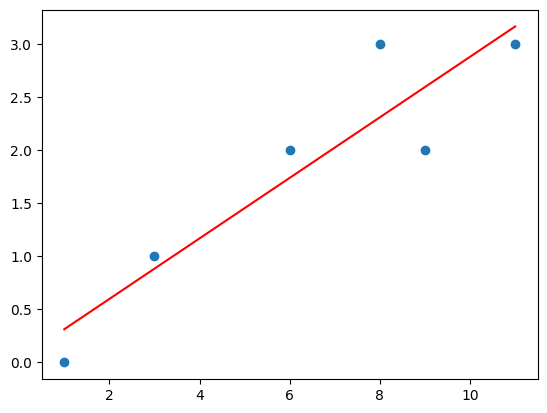

In [78]:
reg_line_new = result.intercept_ + (result.coef_ * new_party['invited'])
plt.plot(new_party['invited'],reg_line_new, color='r')
plt.scatter(data= new_party, x='invited', y='absentees')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(party.absentees, reg_line)
MSE_new = mean_squared_error(new_party.absentees, reg_line_new)

print(f'The MSE for the first model is {round(MSE,2)}')
print(f'The MSE for the second model is {round(MSE_new,2)}')


The MSE for the first model is 0.87
The MSE for the second model is 0.17


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

As we can understand from the MSE scores and also by looking at the plots, the second model fits way better than the first model with the training data. The reason is that in the second model, we eliminated the data points that didn't follow the general pattern produced by the first model. Actually, we kept only data points that confirmed our hypothesis. It seems to be a biased method, however, the number of omitted data points is not that many (actually I deleted 25% of the data so it’s not nothing!) and we can ignore them for this hypothesis.